In [21]:
import pandas as pd

df = pd.read_csv("./airfare_1993_2021.csv")

df['year'] = df['year'].astype(str)
df['quarter'] = df['quarter'].astype(str)

df.dtypes

airport                             object
city                                object
Average Fare                       float64
Inflation Adjusted Average Fare    float64
year                                object
quarter                             object
dtype: object

In [22]:
df.head()

,airport,city,Average Fare,Inflation Adjusted Average Fare,year,quarter
0,HNL,Honolulu,103.28,211.15,1993,1
1,OGG,Kahului,48.83,99.84,1993,1
2,KOA,Kona,45.96,93.98,1993,1
3,LIH,Lihue,48.21,98.56,1993,1
4,ITO,Hilo,42.72,87.34,1993,1


In [23]:
# filter the five biggest airports in Hawaii
df = df[df['airport'].isin(['HNL', 'OGG', 'ITO', 'KOA', 'LIH'])]
df.count()

airport                            580
city                               580
Average Fare                       580
Inflation Adjusted Average Fare    580
year                               580
quarter                            580
dtype: int64

In [24]:
import matplotlib.pyplot as plt

In [25]:
df.groupby(["year", "quarter"]).mean("Average Fare")

Average Fare  Inflation Adjusted Average Fare
year quarter                                               
1993 1              57.800                          118.174
     2              74.132                          150.410
     3              64.494                          130.338
     4              63.126                          126.696
1994 1              66.436                          132.506
...                    ...                              ...
2020 4             252.732                          283.994
2021 1             246.426                          273.970
     2             269.058                          292.292
     3             267.944                          286.494
     4             261.912                          275.860

[116 rows x 2 columns]

In [26]:
df['year_quarter'] = df[['year', 'quarter']].agg('-Q'.join, axis=1)
grouped = df.groupby("year").mean("Average Fare")
grouped

,Average Fare,Inflation Adjusted Average Fare
year,,
1993,64.8880,131.4045
1994,67.6050,133.4750
1995,59.3260,113.9320
1996,59.9355,111.7785
1997,61.3270,111.7760
1998,66.8750,120.0175
1999,70.5470,123.8805
2000,77.4065,131.4595
2001,88.9260,146.9090


In [27]:
years = df['year'].unique()
avg_fare = grouped['Average Fare']
adj_avg_fare = grouped['Inflation Adjusted Average Fare']

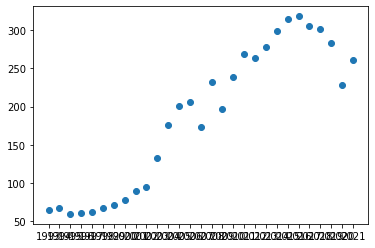

In [28]:
plt.scatter(years, avg_fare)

In [29]:
from sklearn.linear_model import LinearRegression
X = years.reshape(-1, 1)
y = avg_fare.values.reshape(-1, 1)

In [30]:
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

In [31]:
predictions.reshape(1, -1)

array([[ 40.17110345,  50.57351355,  60.97592365,  71.37833374,
         81.78074384,  92.18315394, 102.58556404, 112.98797414,
        123.39038424, 133.79279433, 144.19520443, 154.59761453,
        165.00002463, 175.40243473, 185.80484483, 196.20725493,
        206.60966502, 217.01207512, 227.41448522, 237.81689532,
        248.21930542, 258.62171552, 269.02412562, 279.42653571,
        289.82894581, 300.23135591, 310.63376601, 321.03617611,
        331.43858621]])

In [32]:
y.reshape(1, -1)[0]

array([ 64.888 ,  67.605 ,  59.326 ,  59.9355,  61.327 ,  66.875 ,
        70.547 ,  77.4065,  88.926 ,  94.25  , 132.8515, 176.3695,
       200.219 , 205.3885, 173.1955, 231.918 , 196.543 , 238.8535,
       269.297 , 263.359 , 277.5415, 299.1375, 315.088 , 318.299 ,
       306.0095, 301.1685, 282.74  , 227.941 , 261.335 ])

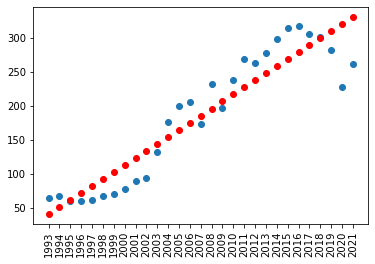

In [51]:
plt.scatter(years, avg_fare)
plt.scatter(years, predictions.reshape(1, -1)[0], color = 'red')
plt.xticks(rotation=90)
plt.savefig("./linreg.png")

In [34]:
from sklearn.metrics import r2_score

In [53]:
print("The r-squared value of the model is:",r2_score(y, predictions))

The r-squared value of the model is: 0.8623787611329689


In [47]:
model.predict([[2023], [2024]])

array([[352.2434064],
       [362.6458165]])